In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import mpmath as mp

## Random series
We consider the random variable
$$X = \sum_{j=1}^\infty c_j \epsilon_j$$ 
$$\mathbb{P}(\epsilon_j = 1) = \mathbb{P}(\epsilon_j = -1)  = 1/2$$ with the $\epsilon_j$ independent, and the $c_j$ some sequence of real numbers. For nice choices of $c_j$, this sum converges almost surely, for instance by the Martingale Convergence Theorem, so that the above indeed defines a random variable.

### Simulations

In [3]:
sum_elts = 50
num_samples = 100000
harmonic_steps = np.arange(1,sum_elts + 1, 1)
powers_2 = np.cumprod(np.ones(sum_elts)*2)
powers_3 = np.cumprod(np.ones(sum_elts)*3)
two_powers = np.arange(1,sum_elts+1, 1) **2
three_powers = np.arange(1,sum_elts+1, 1) **3

$$\sum_{j=1}^\infty \frac{\epsilon_j}{3^j}$$

In [4]:
psum_lst = []
steps_arr = powers_3
start_time = time.time()
for i in range(num_samples):
    epsilons = np.random.choice([-1,1], size=sum_elts)
    elts = epsilons / steps_arr
    psum_lst.append(np.sum(elts))
print("Done computing:", time.time() - start_time, "seconds")

Done computing: 3.764596462249756 seconds


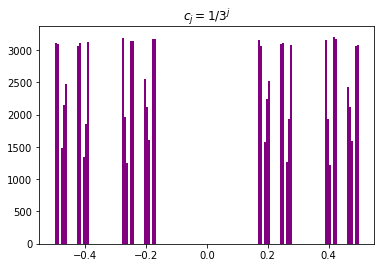

In [9]:
plt.hist(psum_lst, bins=150, 
         color="purple")
plt.title(r"$c_j = 1/3^j$")
if False:
    plt.savefig("./images/temp_sim")
pass

## Numerical integration
$$f(x) = \frac{1}{\pi}\int_0^\infty \cos(xt) \prod_{j=1}^\infty \cos\big(c_n t\big) \; dt$$

For a sum $\sum_{j=1}^\infty c_j \epsilon_j$ with $c_j$ step sizes decreasing quickly enough and such that the characteristic function is in $L^1$, we compute densities using the inversion formula. To do this, we numerically integrate with parameters similar to those in *Cosine Products, Fourier Transforms, and Random Sums* by Kent Morrison, except with higher precision.

In [11]:
start_time = time.time()
x_lst = np.arange(0, 2.01, .01)
times = np.arange(0,40.01, .001)
harmonic_steps = np.arange(1,500,1) # Harmonic series
powers_2 = np.cumprod(np.ones(50)*2)
powers_3 = np.cumprod(np.ones(50)*3)
two_powers = np.arange(1,sum_elts+1, 1) **2
three_powers = np.arange(1,sum_elts+1, 1) **3
step_arr = two_powers

elts  = [[time/step for time in times] for step in step_arr] 
prod_lst = np.prod(np.cos(elts), axis = 0)
integrand_lst = [[np.cos(x * times[k])*prod_lst[k] 
                  for k in range(len(times))] for x in x_lst]
ints = np.trapz(integrand_lst, times, axis=1)
ints = ints/np.pi
print("Done computing:", time.time() - start_time, "seconds")

Done computing: 27.61962628364563 seconds


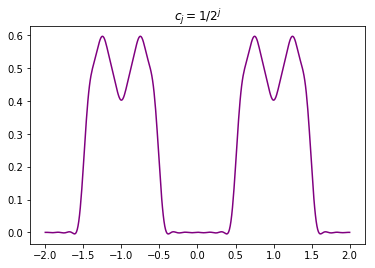

In [12]:
sym_x_lst = np.hstack((-np.flip(x_lst[1:]), x_lst))
sym_ints = np.hstack((np.flip(ints[1:]), ints))
plt.plot(sym_x_lst, sym_ints, color="purple")
plt.title(r"$c_j = 1/2^j$")
if False:
    plt.savefig("./images/temp_int")

## Numerical Integration 2 --- Approximating with Normal Tails

Letting $c_j = \frac{1}{j}$, so that $X$ is a random harmonic series,
$$f(x) \approx \frac{1}{\pi} \int_0^\infty \cos(xt) \, \psi_n(t) \, \psi_{\sigma_nZ}(t) \; dt$$
$$ = \frac{1}{\pi} \int_0^\infty \cos(xt) \, \exp\big(\frac{-\sigma_n^2 t^2}{2}\big)  \prod_{j=0}^n \frac{\sin(t \cdot \frac{2}{{2j+1}})}{t \cdot \frac{2}{{2j+1}}}  \; dt$$
$$\sigma_n^2 = \frac{4}{3} \sum_{j=n+1}^\infty \frac{1}{(2j+1)^2}$$

In [13]:
start_time = time.time()
x_lst = np.arange(0, 4.01, .01)
times = np.arange(0.00001,15.01, .005)
n_prods = 3 # n-1
n_var = 10 # numbers of terms to compute variance
harmonic_steps = [(2*j + 1) for j in range(n_prods + n_var)]
powers_2 = [2**(2*j + 1) for j in range(n_prods + n_var)]
powers_3 = [3**(2*j + 1) for j in range(n_prods + n_var)]
step_arr = harmonic_steps

elts  = np.array([[time * 2/step for time in times]
         for step in step_arr[:n_prods]]) # t * 2/3^{2j+1}
prod_terms = np.sin(elts) / elts
prod_lst = np.prod(prod_terms, axis = 0)

sigma2 = 4/3 * np.sum(1/np.square(step_arr[n_prods:]))

integrand_lst = [[np.cos(x * times[t])* 
                  np.exp(-sigma2 * times[t]**2 /2) *prod_lst[t] 
                  for t in range(len(times))] for x in x_lst]
ints = np.trapz(integrand_lst, times, axis=1)
ints = ints/np.pi
print("Done computing:", time.time() - start_time, "seconds")

Done computing: 9.614635229110718 seconds


0.24999502800928797


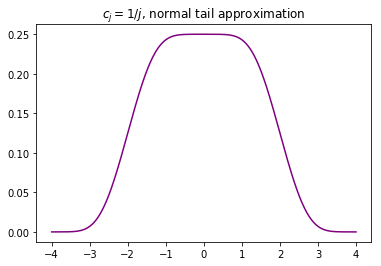

In [14]:
print(ints[0])
sym_x_lst = np.hstack((-np.flip(x_lst[1:]), x_lst))
sym_ints = np.hstack((np.flip(ints[1:]), ints))
plt.plot(sym_x_lst, sym_ints, color="purple")
plt.title(r"$c_j = 1/j$, normal tail approximation")
if False:
    plt.savefig("temp_int2")

## Computing with high precision number system

In [16]:
start_time = time.time()
mp.dps = 10000
x_lst = mp.arange(0, 2.51, .05)
n_prods = 10 # n-1
n_var = 100 # numbers of terms to compute variance
harmonic_steps = [mp.mpf(2*j + 1) for j in range(n_prods + n_var)]
powers_2 = [mp.mpf(2)**(2*j + 1) for j in range(n_prods + n_var)]
powers_3 = [mp.mpf(3)**(2*j + 1) for j in range(n_prods + n_var)]
step_arr = powers_3

sigma2 = 0
for j in range(n_prods, n_prods + n_var):
    sigma2 += 1/mp.power(step_arr[j],2)
sigma2 = sigma2 * mp.mpf(4) / mp.mpf(3)
print(sigma2)

def gen_prod(t):
    p = mp.mpf(1)
    for j in range(n_prods):
        elt = t * 2/step_arr[j]
        p = p * mp.sin(elt) / elt
    return p

# set up for exact char function
x_n_prods = 50
powers_3 = [mp.mpf(3)**j for j in range(x_n_prods)]
two_powers = [mp.power(j,2) for j in range(1,x_n_prods+1)]
x_step_arr = powers_3
def gen_x_prod(t):
    p = mp.mpf(1)
    for j in range(x_n_prods):
        p = p * mp.cos(t/x_step_arr[j])
    return p

ints = []
for x in x_lst:
    f = lambda t: (mp.cos(x*t) *
        mp.exp(-sigma2 * t**2 / 2) *
        gen_prod(t) ) # approximation to char function
    f2 = lambda t: (mp.cos(x * t) * gen_x_prod(t)) # exact char function
    val_int = mp.quad(f2, [0,mp.inf]) / mp.pi
    ints.append(val_int)
        
print("Done computing:", time.time() - start_time, "seconds")

1.23378950099549e-20
Done computing: 32.88795518875122 seconds


1122731863.98209


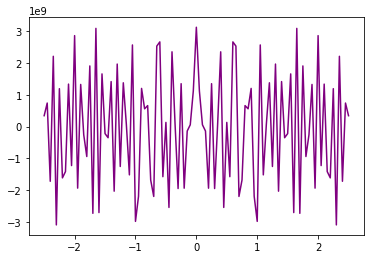

In [17]:
print(ints[1])
sym_x_lst = np.hstack((-np.flip(x_lst[1:]), x_lst))
sym_ints = np.hstack((np.flip(ints[1:]), ints))
plt.plot(sym_x_lst, sym_ints, color="purple")
if False:
    plt.savefig("temp_prec")